# Decision Tree - Company

### Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis. 

#### Input variables:

Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
+ Sales -- Unit sales (in thousands) at each location
+ Competitor Price -- Price charged by competitor at each location
+ Income -- Community income level (in thousands of dollars)
+ Advertising -- Local advertising budget for company at each location (in thousands of dollars)
+ Population -- Population size in region (in thousands)
+ Price -- Price company charges for car seats at each site
+ Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
+ Age -- Average age of the local population
+ Education -- Education level at each location
+ Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
+ US -- A factor with levels No and Yes to indicate whether the store is in the US or not

### Step-1 : Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings as warnings
warnings.filterwarnings("ignore")
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report,confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from collections import Counter
from sklearn import metrics
!pip install imblearn
from imblearn.over_sampling import SMOTE,  ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

### Step-2 : Descriptive analysis

### Step-2.1 : Working with Dataset

#### Loading the Dataset

In [2]:
# Importing the dataset
cmpny_data = pd.read_csv("Company_Data.csv")

#### Exploring the dataset

In [3]:
# Displaying first ten records
cmpny_data.head(10)

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   
5  10.81        124     113           13         501     72       Bad   78   
6   6.63        115     105            0          45    108    Medium   71   
7  11.85        136      81           15         425    120      Good   67   
8   6.54        132     110            0         108    124    Medium   76   
9   4.69        132     113            0         131    124    Medium   76   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No  
5         16    No  Yes  
6         15   Yes   No  
7         10   Yes  Yes  
8         10    No   No  
9         17    No  Yes

In [4]:
# Shape of the data
cmpny_data.shape

(400, 11)

In [5]:
# Summary of the data
cmpny_data.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [6]:
# Check the data types
cmpny_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


#### Modifying the dataset

In [7]:
cmpny_data = cmpny_data.rename(columns={"CompPrice":"Comp_price","ShelveLoc":"Shelve_loc","Age":"Avg_age","US":"US_loc"})
cmpny_data

Sales  Comp_price  Income  Advertising  Population  Price Shelve_loc  \
0     9.50         138      73           11         276    120        Bad   
1    11.22         111      48           16         260     83       Good   
2    10.06         113      35           10         269     80     Medium   
3     7.40         117     100            4         466     97     Medium   
4     4.15         141      64            3         340    128        Bad   
..     ...         ...     ...          ...         ...    ...        ...   
395  12.57         138     108           17         203    128       Good   
396   6.14         139      23            3          37    120     Medium   
397   7.41         162      26           12         368    159     Medium   
398   5.94         100      79            7         284     95        Bad   
399   9.71         134      37            0          27    120       Good   

     Avg_age  Education Urban US_loc  
0         42         17   Yes    Yes  
1         65         10   Yes    Yes  
2         59         12   Yes    Yes  
3         55         14   Yes    Yes  
4         38         13   Yes     No  
..       ...        ...   ...    ...  
395       33         14   Yes    Yes  
396       55         11    No    Yes  
397       40         18   Yes    Yes  
398       50         12   Yes    Yes  
399       49         16   Yes    Yes  

[400 rows x 11 columns]

### Step-2.2 : Handling missing values

In [8]:
# Check for Null values
cmpny_data.isnull().sum()

Sales          0
Comp_price     0
Income         0
Advertising    0
Population     0
Price          0
Shelve_loc     0
Avg_age        0
Education      0
Urban          0
US_loc         0
dtype: int64

In [9]:
# Check for duplicate values
cmpny_data[cmpny_data.duplicated()].shape

(0, 11)

In [10]:
cmpny_data[cmpny_data.duplicated()]

Empty DataFrame
Columns: [Sales, Comp_price, Income, Advertising, Population, Price, Shelve_loc, Avg_age, Education, Urban, US_loc]
Index: []

### Step-2.3 : Feature Engineering

In [11]:
cmpny_data.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

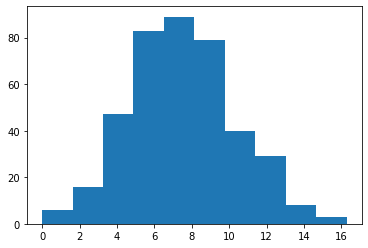

In [12]:
plt.hist('Sales',data=cmpny_data)
plt.show()

####  As the Sales distribution is following normal distribution we can divide the Sales distribution into three categories 'Low', 'Medium' and 'High'. Divide the Sales data using quartiles i.e. 0-25%, 25-75%, 75-100%.

In [13]:
# Including a column "Sal_cat" which is the Sales category dividing the sales into three categories
cmpny_data['Sales_cat'] = pd.cut(x = cmpny_data['Sales'], bins = [0,5.39,9.32,16.3], labels=['Low','Medium','High'], right = False)
cmpny_data.head()

Sales  Comp_price  Income  Advertising  Population  Price Shelve_loc  \
0   9.50         138      73           11         276    120        Bad   
1  11.22         111      48           16         260     83       Good   
2  10.06         113      35           10         269     80     Medium   
3   7.40         117     100            4         466     97     Medium   
4   4.15         141      64            3         340    128        Bad   

   Avg_age  Education Urban US_loc Sales_cat  
0       42         17   Yes    Yes      High  
1       65         10   Yes    Yes      High  
2       59         12   Yes    Yes      High  
3       55         14   Yes    Yes    Medium  
4       38         13   Yes     No       Low

In [14]:
cmpny_data.Sales_cat.value_counts()

Medium    198
High      102
Low       100
Name: Sales_cat, dtype: int64

### Step-2.4 : Exploring data using Visualisation

#### Differentiate Categorical and Numerical features

In [15]:
cmpny_data_cat = cmpny_data.select_dtypes(include=['object','category'])
cmpny_data_cat

Shelve_loc Urban US_loc Sales_cat
0          Bad   Yes    Yes      High
1         Good   Yes    Yes      High
2       Medium   Yes    Yes      High
3       Medium   Yes    Yes    Medium
4          Bad   Yes     No       Low
..         ...   ...    ...       ...
395       Good   Yes    Yes      High
396     Medium    No    Yes    Medium
397     Medium   Yes    Yes    Medium
398        Bad   Yes    Yes    Medium
399       Good   Yes    Yes      High

[400 rows x 4 columns]

In [16]:
cmpny_data_num = cmpny_data.select_dtypes(include=['int64','float64'])
cmpny_data_num

Sales  Comp_price  Income  Advertising  Population  Price  Avg_age  \
0     9.50         138      73           11         276    120       42   
1    11.22         111      48           16         260     83       65   
2    10.06         113      35           10         269     80       59   
3     7.40         117     100            4         466     97       55   
4     4.15         141      64            3         340    128       38   
..     ...         ...     ...          ...         ...    ...      ...   
395  12.57         138     108           17         203    128       33   
396   6.14         139      23            3          37    120       55   
397   7.41         162      26           12         368    159       40   
398   5.94         100      79            7         284     95       50   
399   9.71         134      37            0          27    120       49   

     Education  
0           17  
1           10  
2           12  
3           14  
4           13  
..         ...  
395         14  
396         11  
397         18  
398         12  
399         16  

[400 rows x 8 columns]

#### Differentiate Discrete and Continuous features
+ Numerical variables are usually of 2 types 
+ Discrete features and continuous features

In [17]:
discrete_feature=[feature for feature in cmpny_data_num.columns if len(cmpny_data[feature].unique())<10]
discrete_feature

['Education']

In [18]:
continuous_feature=[feature for feature in cmpny_data_num.columns if feature not in discrete_feature]
continuous_feature

['Sales',
 'Comp_price',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Avg_age']

In [19]:
cmpny_data_cont = cmpny_data_num[continuous_feature]
cmpny_data_cont

Sales  Comp_price  Income  Advertising  Population  Price  Avg_age
0     9.50         138      73           11         276    120       42
1    11.22         111      48           16         260     83       65
2    10.06         113      35           10         269     80       59
3     7.40         117     100            4         466     97       55
4     4.15         141      64            3         340    128       38
..     ...         ...     ...          ...         ...    ...      ...
395  12.57         138     108           17         203    128       33
396   6.14         139      23            3          37    120       55
397   7.41         162      26           12         368    159       40
398   5.94         100      79            7         284     95       50
399   9.71         134      37            0          27    120       49

[400 rows x 7 columns]

#### Univariate Analysis

#### Histogram

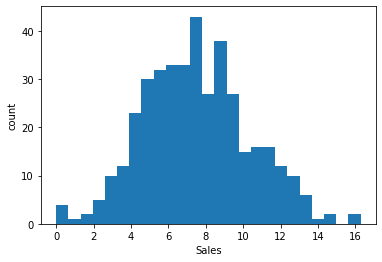

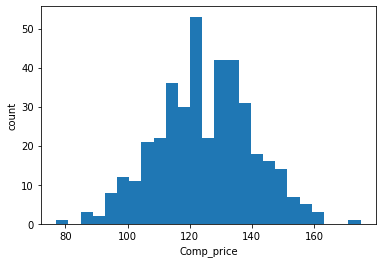

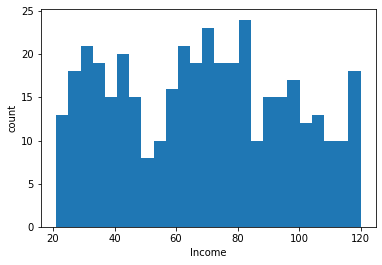

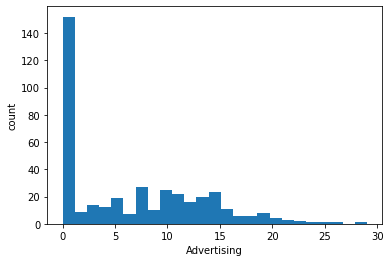

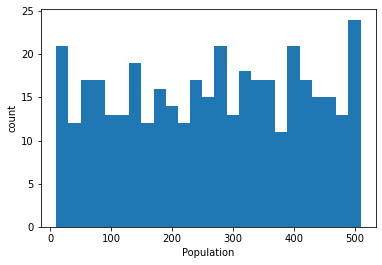

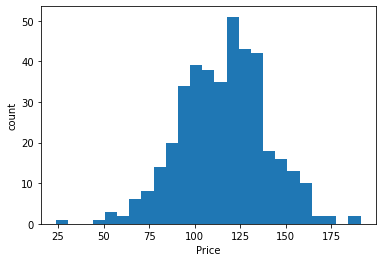

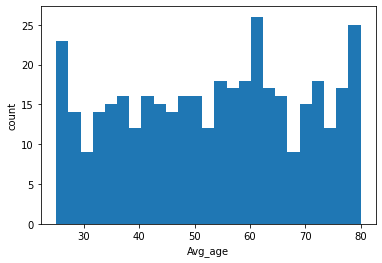

In [20]:
for feature in cmpny_data_cont.columns:
    plt.figure()
    plt.hist(cmpny_data_cont[feature],bins=25)
    plt.xlabel(feature)
    plt.ylabel("count")

#### Boxplot

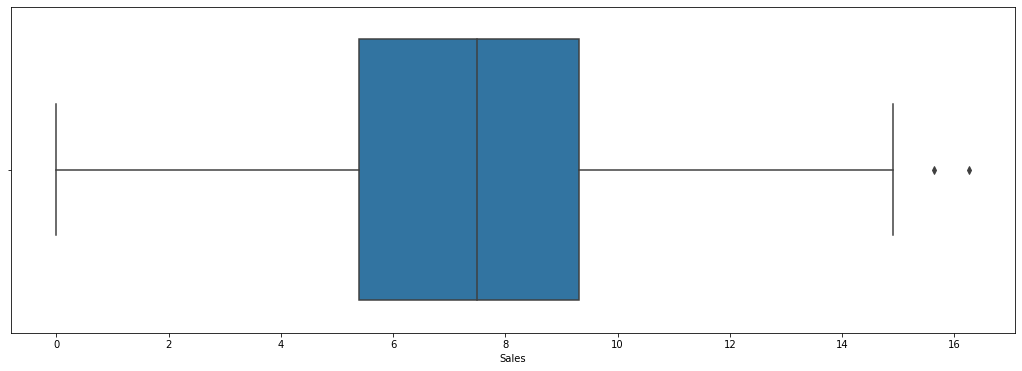

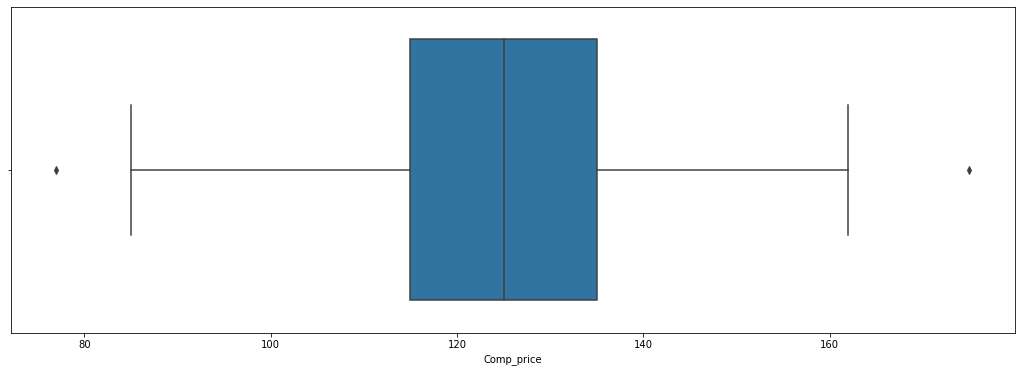

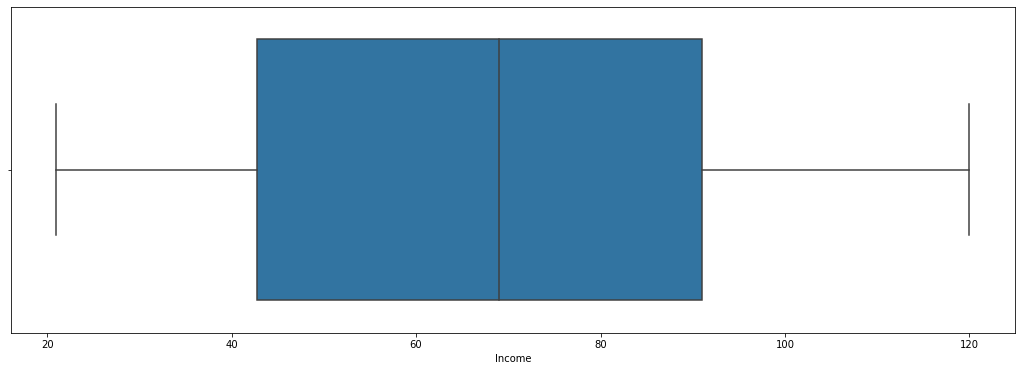

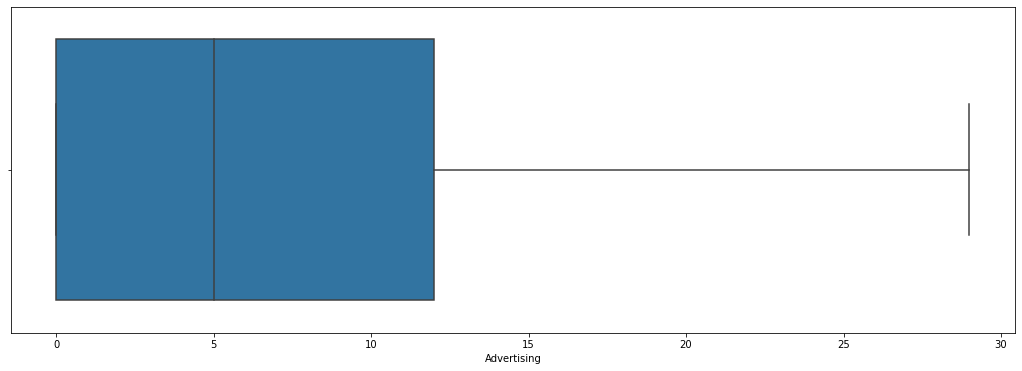

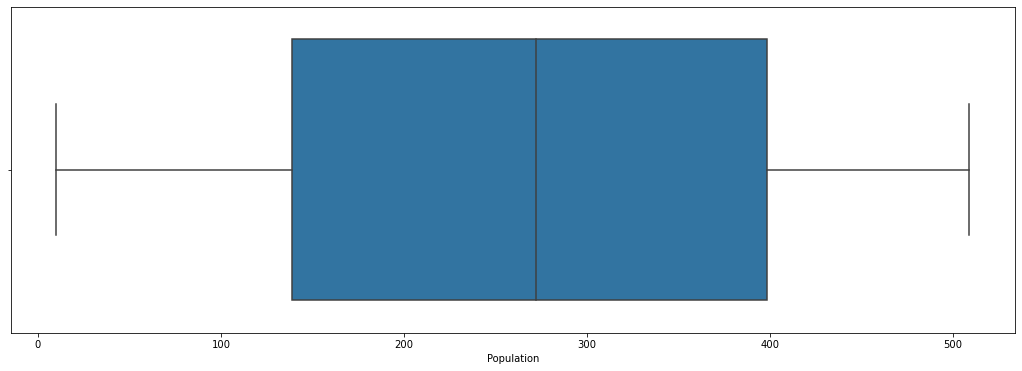

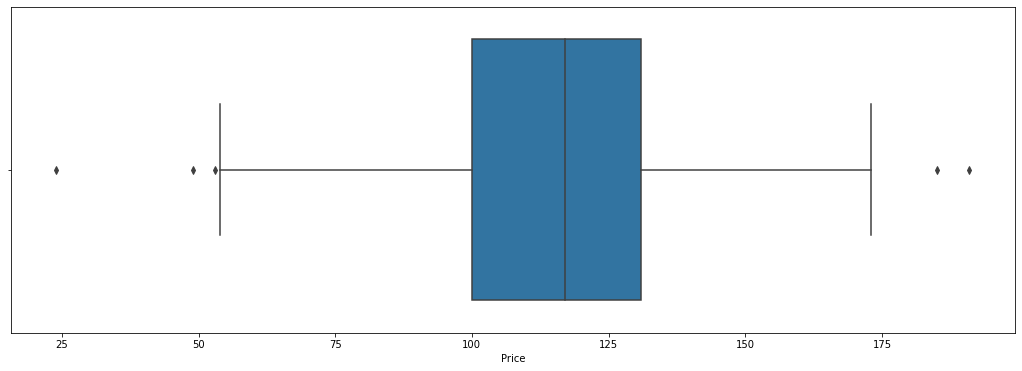

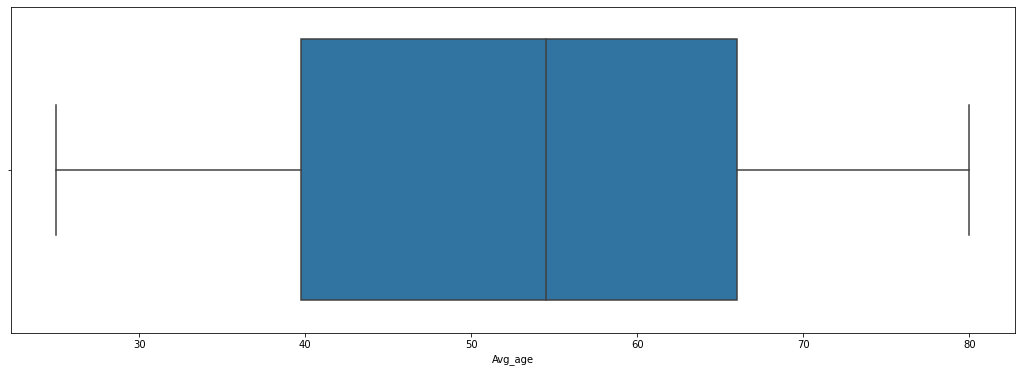

In [21]:
for feature in cmpny_data_cont.columns:
    plt.figure(figsize=(18,6))
    sb.boxplot(cmpny_data_cont[feature])

<AxesSubplot:>

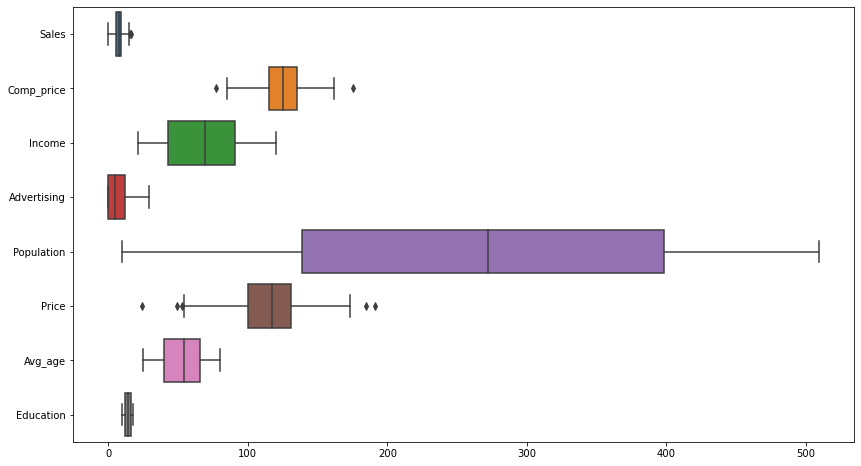

In [22]:
plt.figure(figsize=(14,8))
sb.boxplot(data=cmpny_data_num, orient='h')

#### Multivariate Analysis

#### Correlation and Heat map

In [23]:
# Checking for Correlation between variables
cmpny_data_cont.corr()

Sales  Comp_price    Income  Advertising  Population  \
Sales        1.000000    0.064079  0.151951     0.269507    0.050471   
Comp_price   0.064079    1.000000 -0.080653    -0.024199   -0.094707   
Income       0.151951   -0.080653  1.000000     0.058995   -0.007877   
Advertising  0.269507   -0.024199  0.058995     1.000000    0.265652   
Population   0.050471   -0.094707 -0.007877     0.265652    1.000000   
Price       -0.444951    0.584848 -0.056698     0.044537   -0.012144   
Avg_age     -0.231815   -0.100239 -0.004670    -0.004557   -0.042663   

                Price   Avg_age  
Sales       -0.444951 -0.231815  
Comp_price   0.584848 -0.100239  
Income      -0.056698 -0.004670  
Advertising  0.044537 -0.004557  
Population  -0.012144 -0.042663  
Price        1.000000 -0.102177  
Avg_age     -0.102177  1.000000

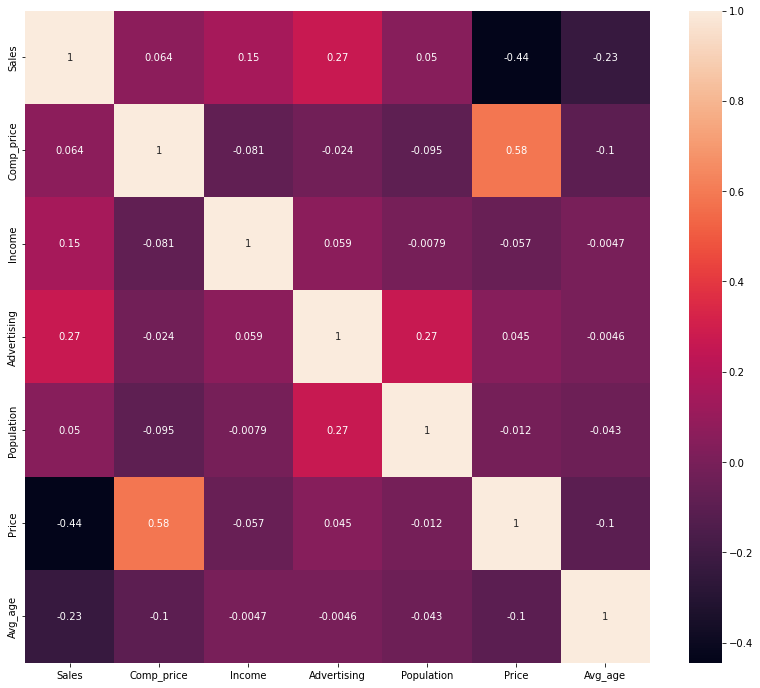

In [24]:
plt.figure(figsize=(14,12))
sb.heatmap(cmpny_data_cont.corr(),annot=True)
plt.show()

<Figure size 576x576 with 0 Axes>

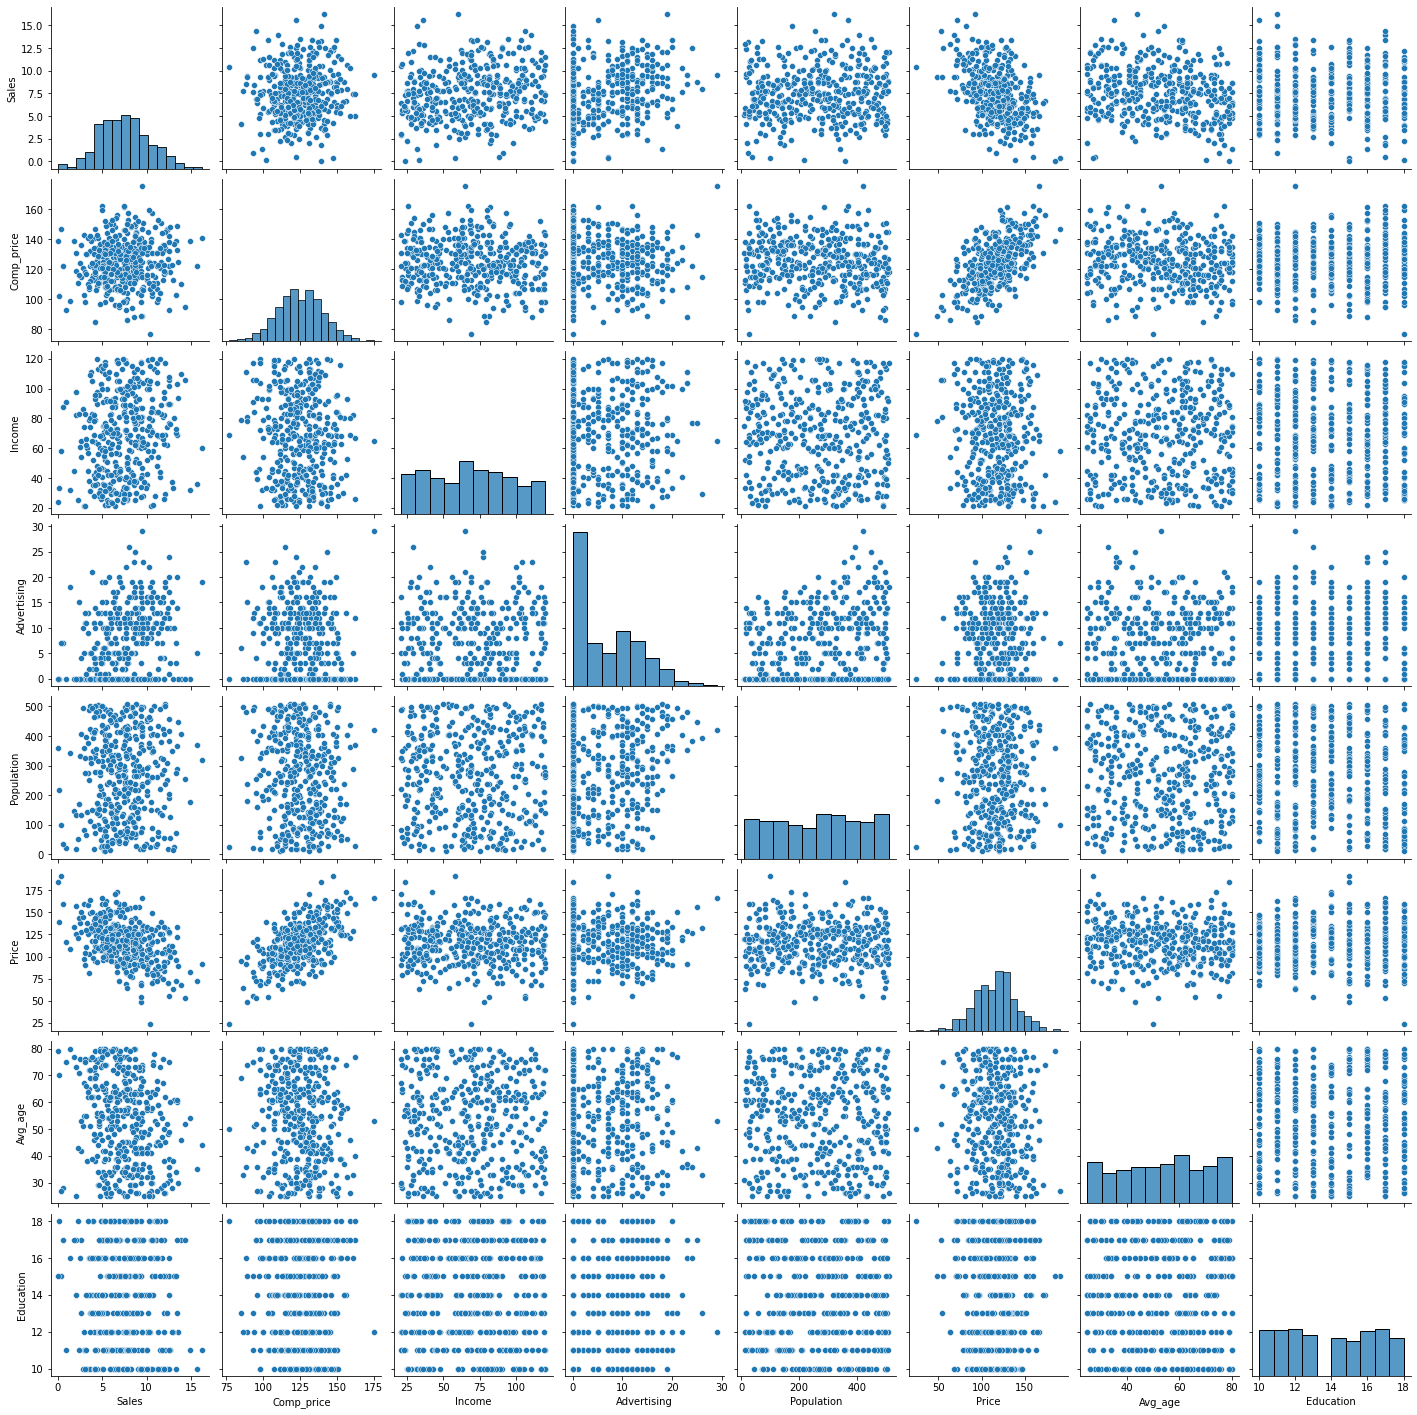

In [25]:
plt.figure(figsize=(8,8))
sb.pairplot(cmpny_data, palette='coolwarm')
plt.show()

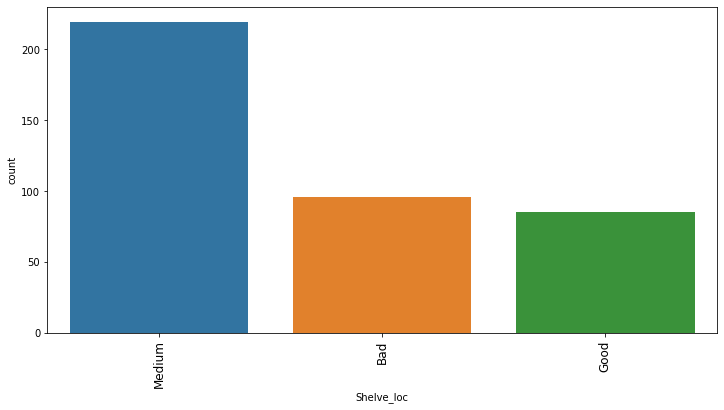

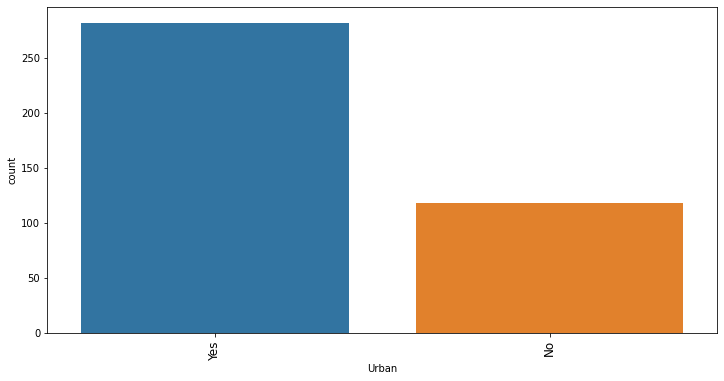

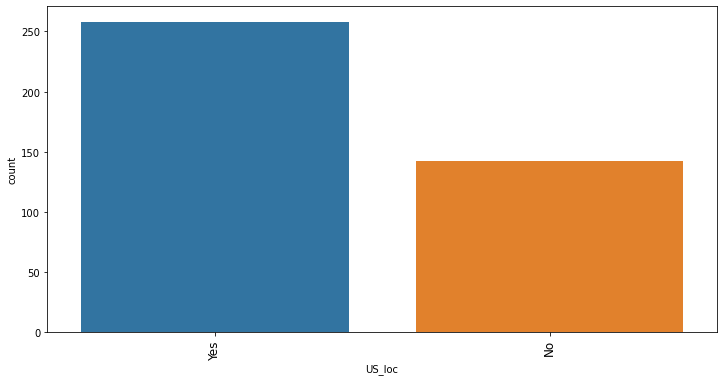

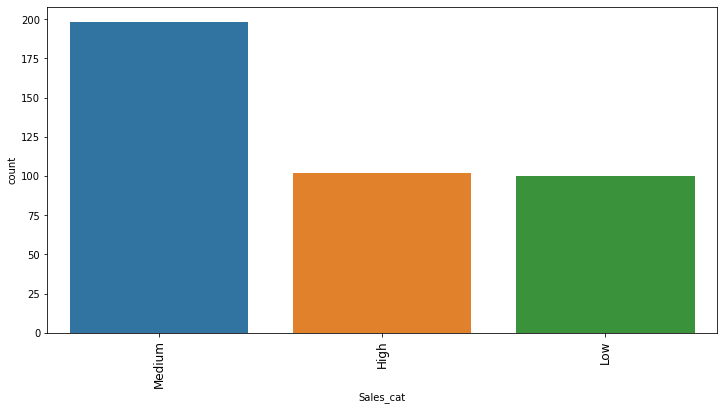

In [26]:
for i in cmpny_data_cat.columns:
    plt.figure(figsize=(12,6))
    sb.countplot(x=i, data=cmpny_data_cat, 
              order=cmpny_data_cat[i].value_counts().index)
    plt.xticks(rotation = 90,fontsize = 12)
plt.show()

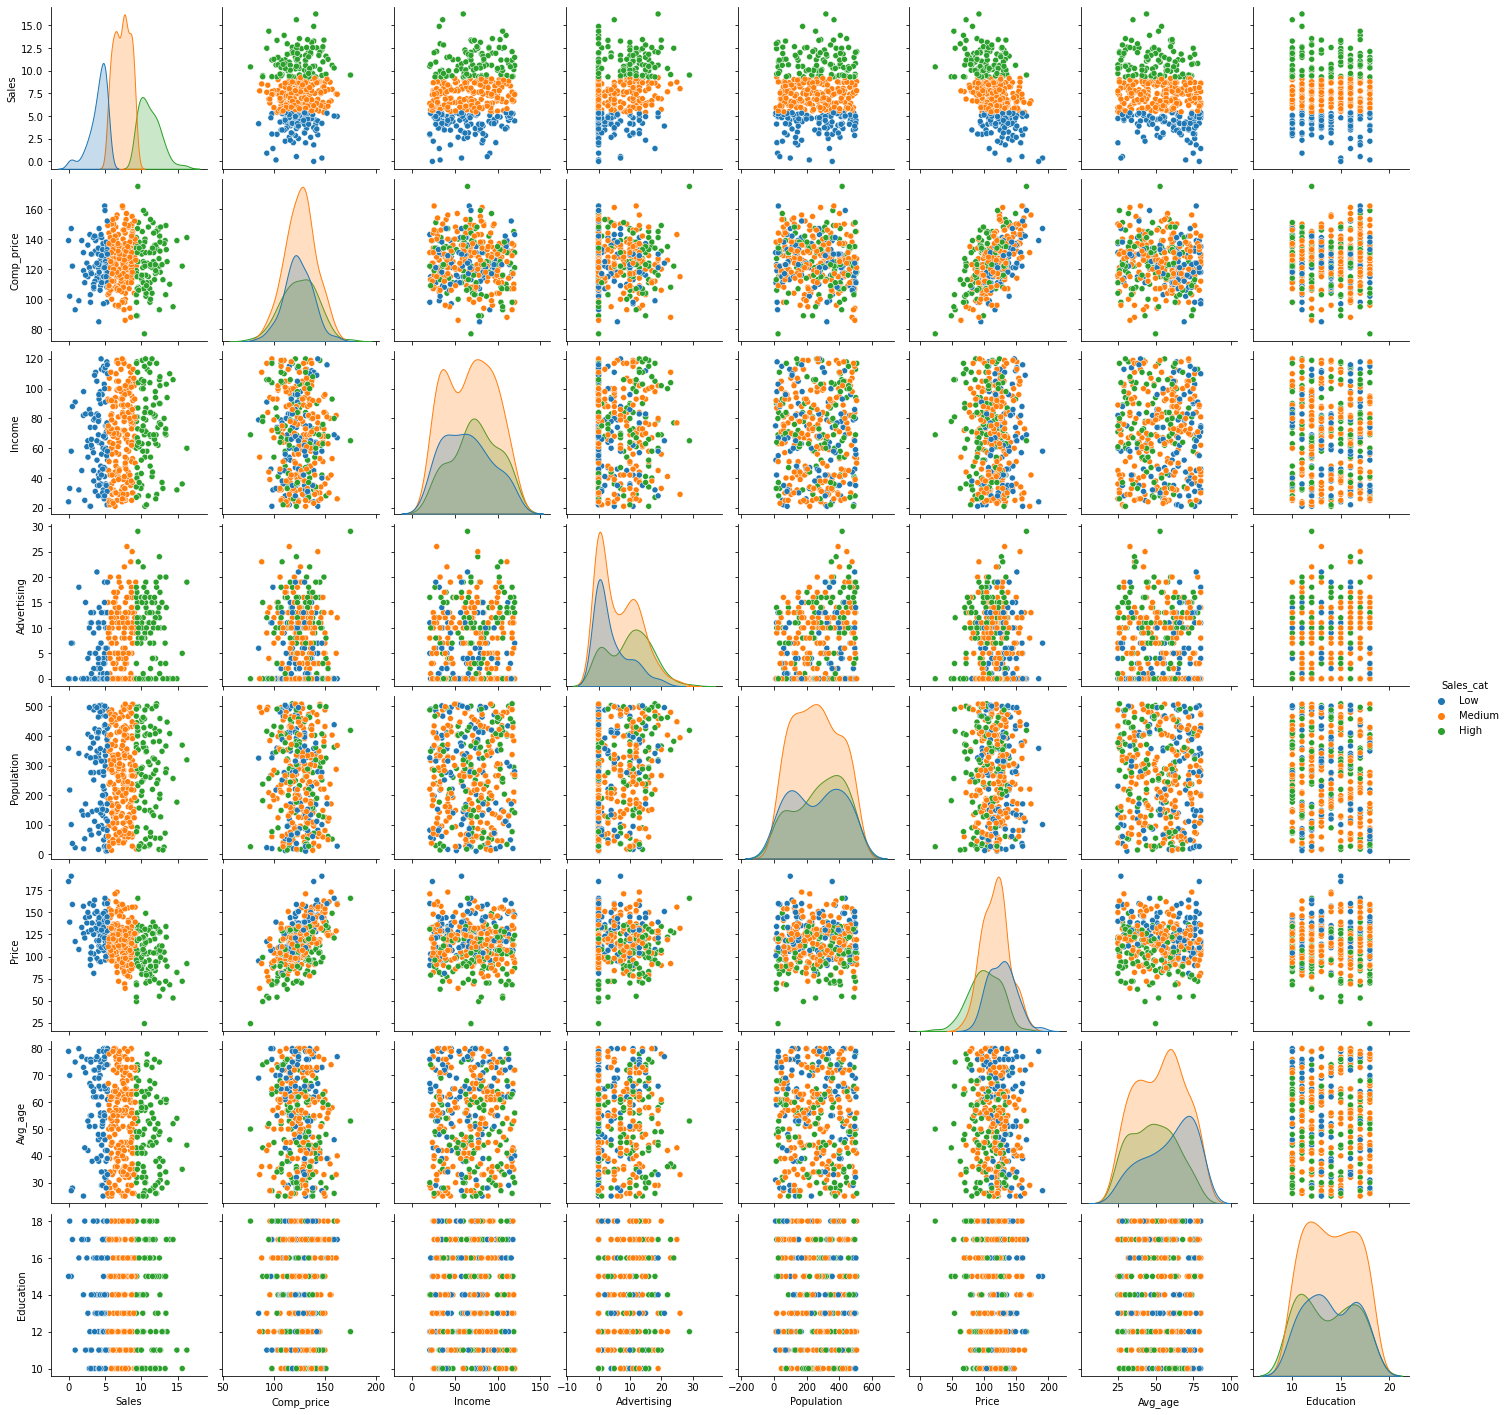

In [27]:
sb.pairplot(data=cmpny_data, hue = 'Sales_cat')

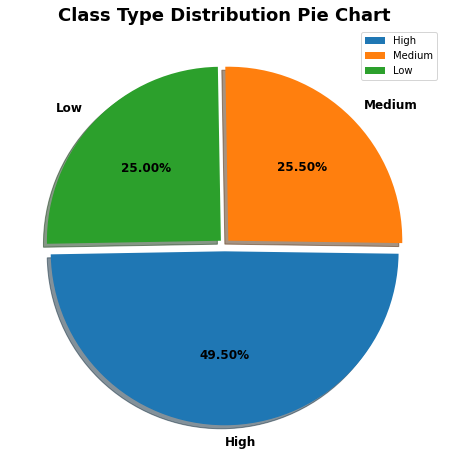

In [28]:
plt.figure(figsize = (12,8))
plt.pie(cmpny_data['Sales_cat'].value_counts(),
       labels=cmpny_data.Sales_cat.unique(),
       explode = [0.04,0.03,0.03],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 181,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

### Step-3 : Data Pre-Processing

#### Converting categorical variables into numerical using One-hot encoding

In [29]:
cmpny_data_mdf = cmpny_data.copy()
cmpny_data_mdf.drop('Sales',axis=1, inplace =True)
cmpny_data_mdf = pd.get_dummies(cmpny_data_mdf.iloc[:,:-1])
cmpny_data_mdf.head()

Comp_price  Income  Advertising  Population  Price  Avg_age  Education  \
0         138      73           11         276    120       42         17   
1         111      48           16         260     83       65         10   
2         113      35           10         269     80       59         12   
3         117     100            4         466     97       55         14   
4         141      64            3         340    128       38         13   

   Shelve_loc_Bad  Shelve_loc_Good  Shelve_loc_Medium  Urban_No  Urban_Yes  \
0               1                0                  0         0          1   
1               0                1                  0         0          1   
2               0                0                  1         0          1   
3               0                0                  1         0          1   
4               1                0                  0         0          1   

   US_loc_No  US_loc_Yes  
0          0           1  
1          0           1  
2          0           1  
3          0           1  
4          1           0

In [30]:
cmpny_data_mdf['Sales_cat'] = cmpny_data.Sales_cat
cmpny_data_mdf.head()

Comp_price  Income  Advertising  Population  Price  Avg_age  Education  \
0         138      73           11         276    120       42         17   
1         111      48           16         260     83       65         10   
2         113      35           10         269     80       59         12   
3         117     100            4         466     97       55         14   
4         141      64            3         340    128       38         13   

   Shelve_loc_Bad  Shelve_loc_Good  Shelve_loc_Medium  Urban_No  Urban_Yes  \
0               1                0                  0         0          1   
1               0                1                  0         0          1   
2               0                0                  1         0          1   
3               0                0                  1         0          1   
4               1                0                  0         0          1   

   US_loc_No  US_loc_Yes Sales_cat  
0          0           1      High  
1          0           1      High  
2          0           1      High  
3          0           1    Medium  
4          1           0       Low

#### Converting categorical variables into numerical using Label encoder

In [31]:
le = LabelEncoder()
le.fit(cmpny_data["Sales_cat"])
cmpny_data_mdf["Sales_cat"]=le.transform(cmpny_data["Sales_cat"])
cmpny_data_mdf.head()

Comp_price  Income  Advertising  Population  Price  Avg_age  Education  \
0         138      73           11         276    120       42         17   
1         111      48           16         260     83       65         10   
2         113      35           10         269     80       59         12   
3         117     100            4         466     97       55         14   
4         141      64            3         340    128       38         13   

   Shelve_loc_Bad  Shelve_loc_Good  Shelve_loc_Medium  Urban_No  Urban_Yes  \
0               1                0                  0         0          1   
1               0                1                  0         0          1   
2               0                0                  1         0          1   
3               0                0                  1         0          1   
4               1                0                  0         0          1   

   US_loc_No  US_loc_Yes  Sales_cat  
0          0           1          0  
1          0           1          0  
2          0           1          0  
3          0           1          2  
4          1           0          1

### Step-4 : Feature Selection

### Step-4.1 : Split the data into training and testing data

In [32]:
x = cmpny_data_mdf.drop('Sales_cat', 1)
y = cmpny_data_mdf['Sales_cat']

In [33]:
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x, y)

In [34]:
# summarize scores
scores = fit.scores_

features = fit.transform(x)

In [35]:
score_df = pd.DataFrame(list(zip(scores, x.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

Score            Feature
4   300.881058              Price
2   251.767458        Advertising
3   141.113336         Population
5   106.577639            Avg_age
8    66.174919    Shelve_loc_Good
1    65.145403             Income
7    48.524460     Shelve_loc_Bad
12   13.109136          US_loc_No
9     8.654770  Shelve_loc_Medium
13    7.215106         US_loc_Yes
0     2.253637         Comp_price
6     0.689685          Education
10    0.163751           Urban_No
11    0.068520          Urban_Yes

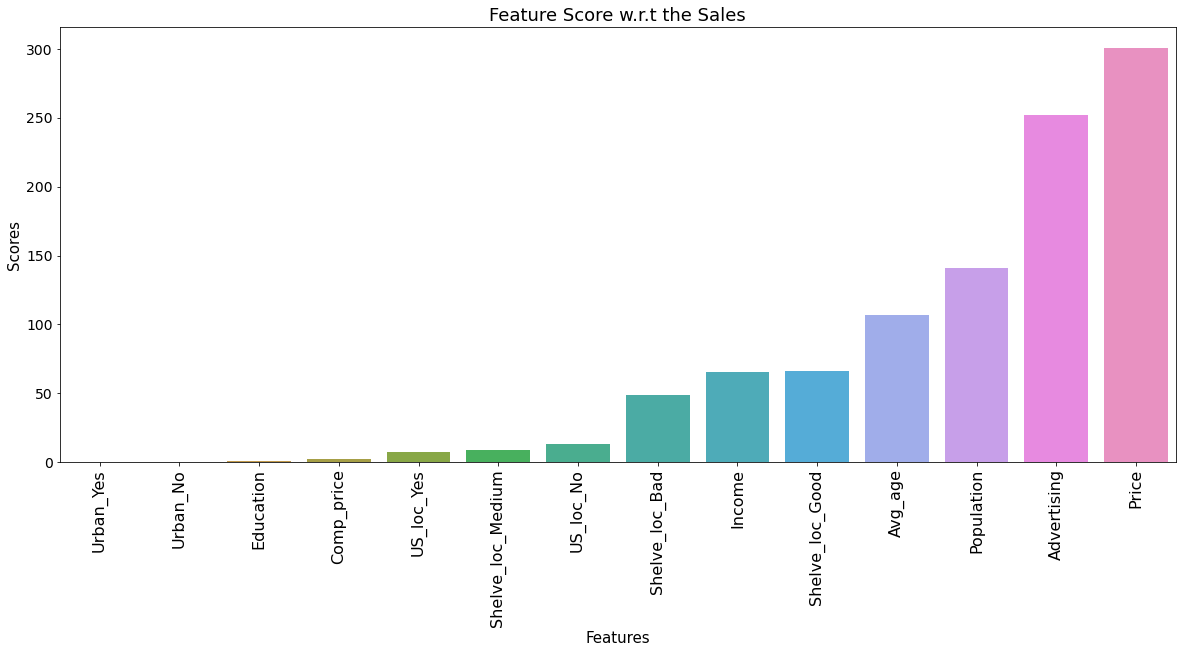

In [36]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sb.barplot(x='Feature',
            y="Score", 
            data=score_df, 
            order=score_df.sort_values('Score').Feature)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [37]:
model_data = cmpny_data_mdf[['Price', 'Advertising','Population', 'Income', 'Avg_age', 'Shelve_loc_Good', 'Shelve_loc_Bad','Sales_cat']]
model_data.head()

Price  Advertising  Population  Income  Avg_age  Shelve_loc_Good  \
0    120           11         276      73       42                0   
1     83           16         260      48       65                1   
2     80           10         269      35       59                0   
3     97            4         466     100       55                0   
4    128            3         340      64       38                0   

   Shelve_loc_Bad  Sales_cat  
0               1          0  
1               0          0  
2               0          0  
3               0          2  
4               1          1

In [38]:
x = model_data.drop('Sales_cat',axis=1)
y = model_data['Sales_cat']

In [39]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# enumerate the splits and summarize the distributions
for train_ix, test_ix in skf.split(x, y):
# select rows
    train_X, test_X = x.iloc[train_ix], x.loc[test_ix]
    train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]
# summarize train and test composition
counter_train = Counter(train_y)
counter_test = Counter(test_y)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({2: 178, 0: 92, 1: 90}) Testing Data Counter({2: 20, 1: 10, 0: 10})


In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=42)

In [41]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (280, 7)
Shape of X_test:  (120, 7)
Shape of y_train:  (280,)
Shape of y_test (120,)


### Step-5 : Build a Decision Tree model

### Step-5.1 : Grid search using Stratified Kfold Splits on Imbalanced Dataset

In [42]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [43]:
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(train_X, train_y)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(train_X, train_y)
print_score(tree_clf, train_X, train_y, test_X, test_y, train=True)
print_score(tree_clf, train_X, train_y, test_X, test_y, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'random'})
Train Result:
Accuracy Score: 79.44%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision   0.769231   0.765957    0.827160  0.794444    0.787450   
recall      0.869565   0.800000    0.752809  0.794444    0.807458   
f1-score    0.816327   0.782609    0.788235  0.794444    0.795724   
support    92.000000  90.000000  178.000000  0.794444  360.000000   

           weighted avg  
precision      0.797055  
recall         0.794444  
f1-score       0.794008  
support      360.000000  
_______________________________________________
Confusion Matrix: 
 [[ 80   0  12]
 [  2  72  16]
 [ 22  22 134]]

Test Result:
Accuracy Score: 60.00%
_______________________________________________
CLASSIFICATION REPORT:
   

In [44]:
# Get score for different values of n
decision_tree = DecisionTreeClassifier()
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

results = cross_val_score(decision_tree, train_X, train_y, cv=skf)
print(results.mean())

0.6083333333333333


In [45]:
param_dict = {
    "criterion":["gini","entropy"],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,10)
}

grid = GridSearchCV(decision_tree,
                   param_grid = param_dict,
                   cv=skf,
                   verbose=1,
                   n_jobs=6)

grid.fit(train_X,train_y)

model = grid.best_estimator_

Fitting 10 folds for each of 1458 candidates, totalling 14580 fits


In [46]:
grid.best_score_

0.6888888888888889

In [47]:
predict_output = model.predict(test_X)
accuracy_test = accuracy_score(test_y,predict_output)
accuracy_test

0.55

<AxesSubplot:>

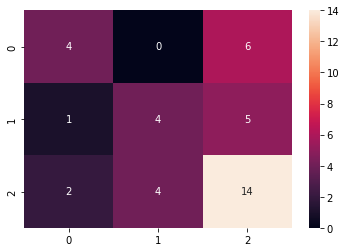

In [48]:
sb.heatmap(confusion_matrix(test_y, predict_output),annot=True)

In [49]:
print(classification_report(test_y,predict_output))

              precision    recall  f1-score   support

           0       0.57      0.40      0.47        10
           1       0.50      0.40      0.44        10
           2       0.56      0.70      0.62        20

    accuracy                           0.55        40
   macro avg       0.54      0.50      0.51        40
weighted avg       0.55      0.55      0.54        40



### Step-5.2 : Grid search using Train Test Splits Stratifying Target feature on Imbalanced Dataset

In [50]:
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(x_train, y_train)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=True)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'})
Train Result:
Accuracy Score: 70.00%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision   0.792453   0.692308    0.671141       0.7    0.718634   
recall      0.583333   0.729730    0.746269       0.7    0.686444   
f1-score    0.672000   0.710526    0.706714       0.7    0.696413   
support    72.000000  74.000000  134.000000       0.7  280.000000   

           weighted avg  
precision      0.707929  
recall         0.700000  
f1-score       0.698795  
support      280.000000  
_______________________________________________
Confusion Matrix: 
 [[ 42   0  30]
 [  1  54  19]
 [ 10  24 100]]

Test Result:
Accuracy Score: 67.50%
_______________________________________________
CLASSIFICATION REPORT:
    

In [51]:
# Get score for different values of n
decision_tree = DecisionTreeClassifier()
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

results = cross_val_score(decision_tree, x_train, y_train, cv=skf)
print(results.mean())

0.5071428571428571


In [52]:
param_dict = {
    "criterion":["gini","entropy"],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,10)
}

grid = GridSearchCV(decision_tree,
                   param_grid = param_dict,
                   cv=skf,
                   verbose=1,
                   n_jobs=6)

grid.fit(x_train,y_train)

model = grid.best_estimator_

Fitting 10 folds for each of 1458 candidates, totalling 14580 fits


In [53]:
grid.best_score_

0.5821428571428572

In [54]:
predict_output = model.predict(x_test)
accuracy_test = accuracy_score(y_test,predict_output)
accuracy_test

0.5166666666666667

<AxesSubplot:>

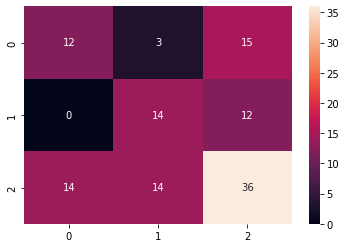

In [55]:
sb.heatmap(confusion_matrix(y_test, predict_output),annot=True)

In [56]:
print(classification_report(y_test,predict_output))

              precision    recall  f1-score   support

           0       0.46      0.40      0.43        30
           1       0.45      0.54      0.49        26
           2       0.57      0.56      0.57        64

    accuracy                           0.52       120
   macro avg       0.49      0.50      0.50       120
weighted avg       0.52      0.52      0.52       120



#### Observation: 
+ In both the condition, due to imbalanced dataset our results are getting biased towards the majority. The model is correctly classifying all the majority classes yet fails to classify the minority classes. Hence, we need to use some kind of oversampling techniques to balance the dataset.

### Step-6 : Handling imbalance data using SMOTE based techniques

In [57]:
x = model_data.drop(['Sales_cat'], axis=1)
y = model_data['Sales_cat']

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=42,stratify=y)

In [58]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (280, 7)
Shape of X_test:  (120, 7)
Shape of y_train:  (280,)
Shape of y_test (120,)


### Step-6.1 : SMOTE Oversampling technique

In [59]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({2: 139, 0: 71, 1: 70})
After Counter({2: 139, 0: 139, 1: 139})


### Step-6.2 : ADASYN: Adaptive Synthetic Sampling Approach

In [60]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=42)
x_train_ada, y_train_ada = ada.fit_resample(x_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({2: 139, 0: 71, 1: 70})
After Counter({0: 141, 1: 140, 2: 139})


### Step-6.3 : Hybridization: SMOTE + Tomek Links

In [61]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=42)
x_train_smtom, y_train_smtom = smtom.fit_resample(x_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({2: 139, 0: 71, 1: 70})
After Counter({0: 128, 1: 128, 2: 123})


### Step-6.4 : Hybridization: SMOTE + ENN

In [62]:
counter = Counter(y_train)
print('Before',counter)
#oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
x_train_smenn, y_train_smenn = smenn.fit_resample(x_train, y_train)

counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({2: 139, 0: 71, 1: 70})
After Counter({1: 64, 0: 53, 2: 8})


### Step-6.5 : Performance Analysis after Resampling

In [63]:
sampled_data = {
    'ACTUAL':[x_train, y_train],
    'SMOTE':[x_train_sm, y_train_sm],
    'ADASYN':[x_train_ada, y_train_ada],
    'SMOTE_TOMEK':[x_train_smtom, y_train_smtom],
    'SMOTE_ENN':[x_train_smenn, y_train_smenn]
}

In [64]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    #plot_confusion_matrix(clf_model, X_test, y_test)  
    #plt.show() 
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    #print('AUC-ROC')
    #print('='*60)
    #print(roc_auc_score(y_test, y_prob[:,1], multi_class='ovo'))
    
    #x = roc_auc_score(y_test, y_prob[:,1])
    f1 = f1_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    precision = precision_score(y_test, y_pred, average='micro')
          
    
    return algo,precision,recall,f1,sampling

In [65]:
model_params = {
    'decision_tree' :{
        'model' :  DecisionTreeClassifier(),
        'params' : {
             'max_depth': [i for i in range(5,16,2)],
             'min_samples_split': [2, 5, 10, 15, 20, 50, 100],
             'min_samples_leaf': [1, 2, 5],
             'criterion': ['gini', 'entropy'],
             'max_features': ['log2', 'sqrt', 'auto']
        }
        
    }
    
}

In [66]:
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
output = []
for model , model_hp in model_params.items():
    for resam , data in sampled_data.items():
        clf = RandomizedSearchCV(model_hp['model'], model_hp['params'],cv = cv, scoring='roc_auc', n_jobs=-1 )
        clf.fit(data[0], data[1])
        clf_best = clf.best_estimator_
        print('x'*60)
        print(model+' with ' + resam)
        print('='*60)
        output.append(test_eval(clf_best, x_test, y_test, model, resam))

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
decision_tree with ACTUAL
Confusion Matrix
[[17  0 14]
 [ 1 19 10]
 [ 8 13 38]] 

Classification Report
              precision    recall  f1-score   support

           0       0.65      0.55      0.60        31
           1       0.59      0.63      0.61        30
           2       0.61      0.64      0.63        59

    accuracy                           0.62       120
   macro avg       0.62      0.61      0.61       120
weighted avg       0.62      0.62      0.62       120
 

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
decision_tree with SMOTE
Confusion Matrix
[[14  6 11]
 [ 4 20  6]
 [17 32 10]] 

Classification Report
              precision    recall  f1-score   support

           0       0.40      0.45      0.42        31
           1       0.34      0.67      0.45        30
           2       0.37      0.17      0.23        59

    accuracy                           0.37       120
   macro avg    

#### As per the above results, we can observe that ADASYN technique gave the best results. Hence use this.

In [67]:
counter = Counter(y)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=42)
x_train_ada, y_train_ada = ada.fit_resample(x, y)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({2: 198, 0: 102, 1: 100})
After Counter({0: 199, 2: 198, 1: 197})


In [68]:
x_train,x_test,y_train,y_test = train_test_split(x_train_ada,y_train_ada,test_size=0.3,random_state=42, stratify=y_train_ada)

counter = Counter(y_train_ada)
print('Before',counter)
counter = Counter(y_train)
print('After',counter)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Before Counter({0: 199, 2: 198, 1: 197})
After Counter({0: 139, 1: 138, 2: 138})
Shape of X_train:  (415, 7)
Shape of X_test:  (179, 7)
Shape of y_train:  (415,)
Shape of y_test (179,)


### Step-7 : Pruning

In [69]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 6))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 6)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=10)
tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(x_train, y_train)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=True)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=False)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits
Best paramters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 72.05%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1           2  accuracy   macro avg  \
precision    0.890000    0.708791    0.609023  0.720482    0.735938   
recall       0.640288    0.934783    0.586957  0.720482    0.720676   
f1-score     0.744770    0.806250    0.597786  0.720482    0.716269   
support    139.000000  138.000000  138.000000  0.720482  415.000000   

           weighted avg  
precision      0.736309  
recall         0.720482  
f1-score       0.716337  
support      415.000000  
_______________________________________________
Confusion Matrix: 
 [[ 89   6  44]
 [  1 129   8]
 [ 10  47  81]]

Test Result:
Accuracy Score: 62.57%
_______________________________________________
CLASSIFICATION REPOR

#### This is a balanced state of training and testing accuracy are close to each other where there is no overfitting or underfitting yet we can do better than this, let's try post pruning technique using alpha values.

### Step-7.1 : Building Decision Tree Classifier using Entropy Criteria with Alpha values Post Pruning

In [70]:
model_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
model_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

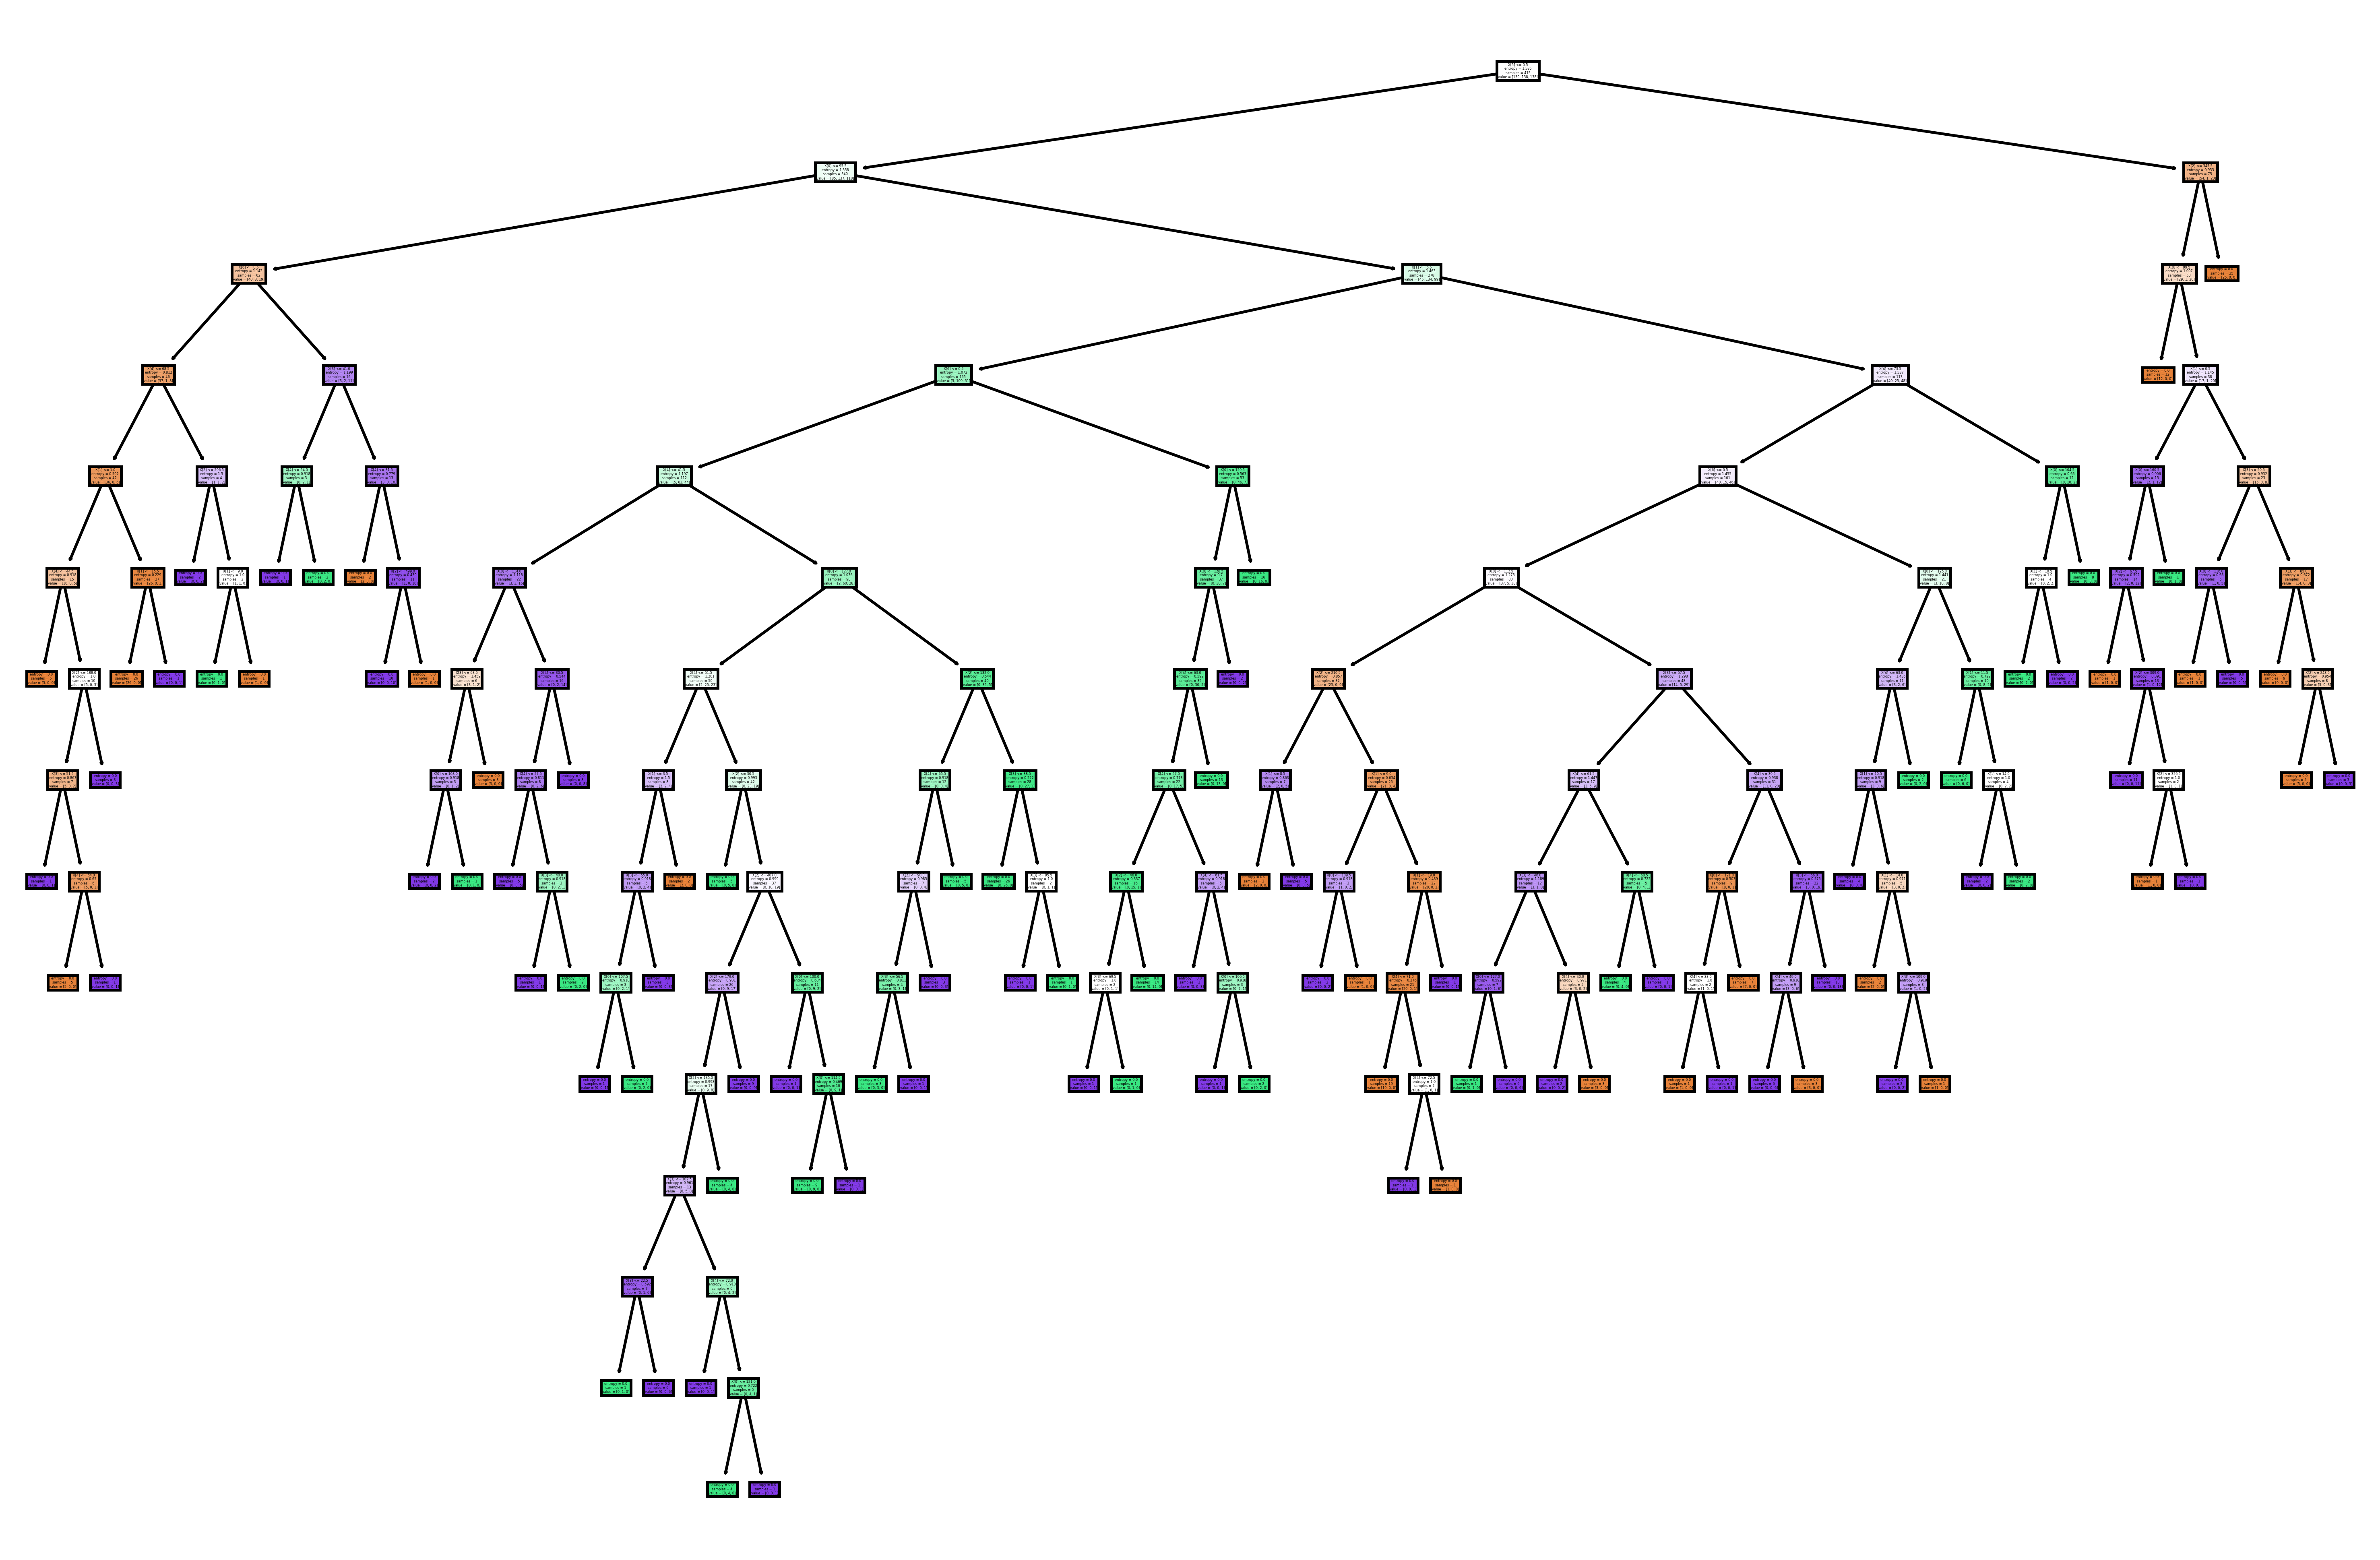

In [71]:
plt.figure(figsize=(15,10),dpi=500)
tree.plot_tree(model_entropy,filled=True)
plt.show()

In [72]:
#Predicting on test data
preds = model_entropy.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    64
2    63
1    52
dtype: int64

In [73]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0       0   1   2
Sales_cat            
0          48   0  12
1           2  42  15
2          14  10  36

In [74]:
# Accuracy 
np.mean(preds==y_test)

0.7039106145251397

In [75]:
# Classification Report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77        60
           1       0.81      0.71      0.76        59
           2       0.57      0.60      0.59        60

    accuracy                           0.70       179
   macro avg       0.71      0.70      0.71       179
weighted avg       0.71      0.70      0.71       179



In [76]:
path = model_entropy.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [77]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='entropy',random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.13972201424203834


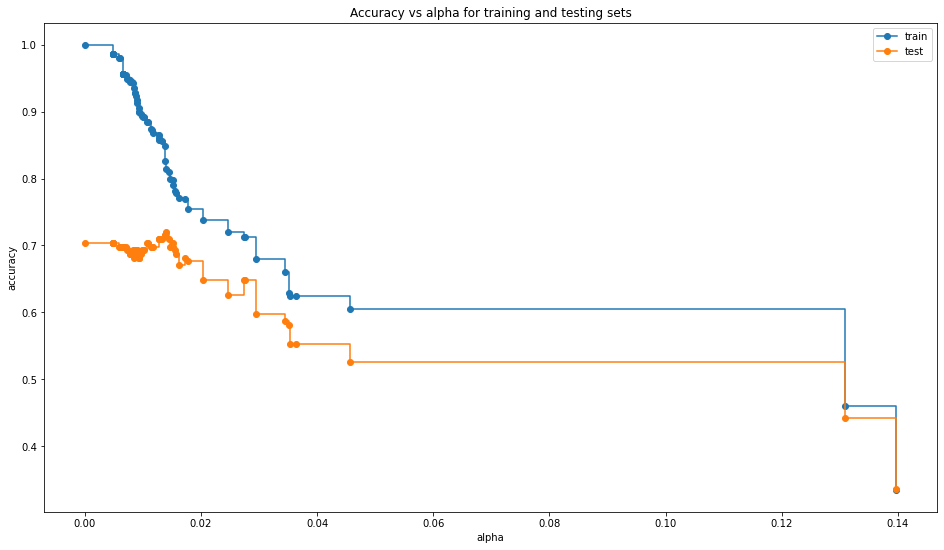

In [78]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(16,9))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [79]:
ccp_alphas

array([0.        , 0.00481928, 0.00481928, 0.00481928, 0.00481928,
       0.00481928, 0.00481928, 0.0058491 , 0.00609476, 0.00663828,
       0.00663828, 0.00663828, 0.00663828, 0.00663828, 0.00663828,
       0.00663828, 0.00715921, 0.00727933, 0.00743655, 0.00770422,
       0.00781955, 0.00818468, 0.00821665, 0.00841723, 0.00869793,
       0.00869793, 0.00879876, 0.00891795, 0.00906557, 0.00931638,
       0.00939791, 0.00939791, 0.00963855, 0.00993483, 0.00998002,
       0.01017825, 0.01075052, 0.01084109, 0.01140845, 0.01164932,
       0.0116982 , 0.01269446, 0.01276405, 0.01277202, 0.01334436,
       0.01376989, 0.01384965, 0.01394098, 0.01445783, 0.01472149,
       0.0151926 , 0.01523131, 0.01544569, 0.01562366, 0.01618967,
       0.0172188 , 0.0178079 , 0.02041793, 0.02472267, 0.02741442,
       0.0275912 , 0.02954384, 0.03443879, 0.03508213, 0.03536613,
       0.03635209, 0.04557397, 0.13079354, 0.13972201])

In [80]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=42, ccp_alpha=0.03635209)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.03635209, criterion='entropy',
                       random_state=42)

In [81]:
pred_test=clf.predict(x_test)
pred_train=clf.predict(x_train)
from sklearn.metrics import accuracy_score
print('Training Accuracy',accuracy_score(y_train, pred_train),'\n'
'Testing Accuracy',accuracy_score(y_test, pred_test))

Training Accuracy 0.6240963855421687 
Testing Accuracy 0.553072625698324


<AxesSubplot:>

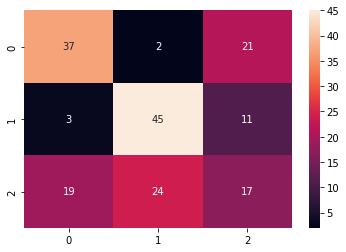

In [82]:
sb.heatmap(confusion_matrix(y_test, pred_test),annot=True)

In [83]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.63      0.62      0.62        60
           1       0.63      0.76      0.69        59
           2       0.35      0.28      0.31        60

    accuracy                           0.55       179
   macro avg       0.54      0.55      0.54       179
weighted avg       0.54      0.55      0.54       179



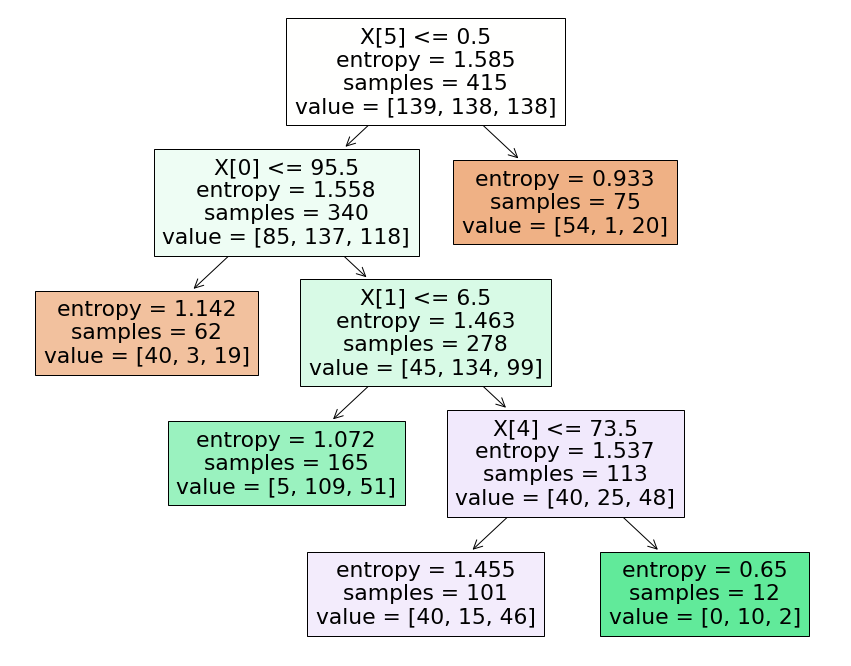

In [84]:
plt.figure(figsize=(15,12))
tree.plot_tree(clf,filled=True)
plt.show()

[Text(0.5, 0.9, 'Shelve_loc_Good <= 0.5\nentropy = 1.585\nsamples = 415\nvalue = [139, 138, 138]\nclass = Low'),
 Text(0.3333333333333333, 0.7, 'Price <= 95.5\nentropy = 1.558\nsamples = 340\nvalue = [85, 137, 118]\nclass = Medium'),
 Text(0.16666666666666666, 0.5, 'entropy = 1.142\nsamples = 62\nvalue = [40, 3, 19]\nclass = Low'),
 Text(0.5, 0.5, 'Advertising <= 6.5\nentropy = 1.463\nsamples = 278\nvalue = [45, 134, 99]\nclass = Medium'),
 Text(0.3333333333333333, 0.3, 'entropy = 1.072\nsamples = 165\nvalue = [5, 109, 51]\nclass = Medium'),
 Text(0.6666666666666666, 0.3, 'Avg_age <= 73.5\nentropy = 1.537\nsamples = 113\nvalue = [40, 25, 48]\nclass = High'),
 Text(0.5, 0.1, 'entropy = 1.455\nsamples = 101\nvalue = [40, 15, 46]\nclass = High'),
 Text(0.8333333333333334, 0.1, 'entropy = 0.65\nsamples = 12\nvalue = [0, 10, 2]\nclass = Medium'),
 Text(0.6666666666666666, 0.7, 'entropy = 0.933\nsamples = 75\nvalue = [54, 1, 20]\nclass = Low')]

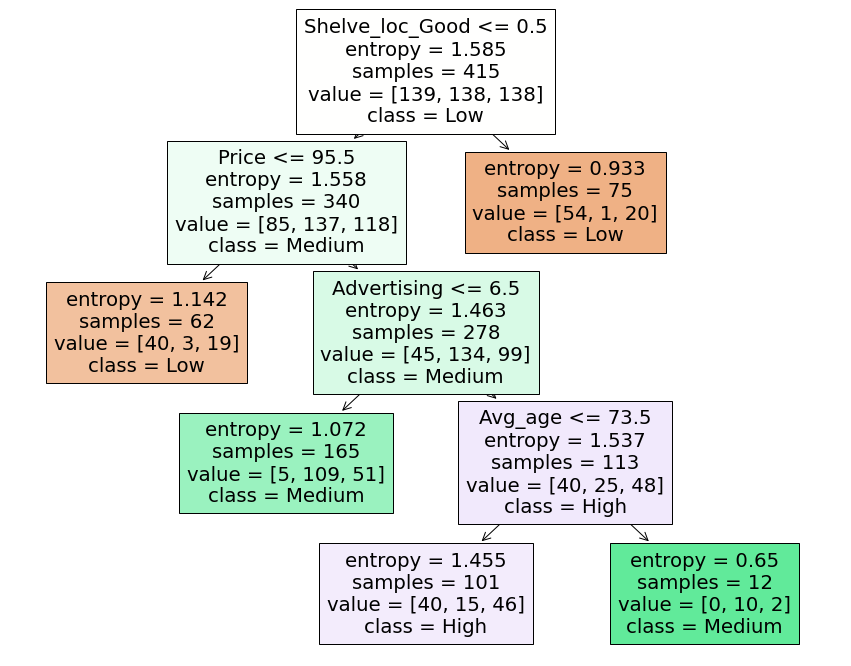

In [85]:
fn = x_train.columns
cn = ['Low','Medium','High']
plt.figure(figsize=(15,12))
tree.plot_tree(clf, feature_names=fn, class_names=cn, filled=True)

In [86]:
clf.feature_importances_ 

array([0.28160195, 0.30375718, 0.        , 0.        , 0.10198187,
       0.312659  , 0.        ])

In [87]:
feature_imp = pd.Series(clf.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

Shelve_loc_Good    0.312659
Advertising        0.303757
Price              0.281602
Avg_age            0.101982
Population         0.000000
Income             0.000000
Shelve_loc_Bad     0.000000
dtype: float64

### Step-7.2 : Building Decision Tree Classifier using Gini Criteria with Alpha values Post Pruning

In [88]:
model_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

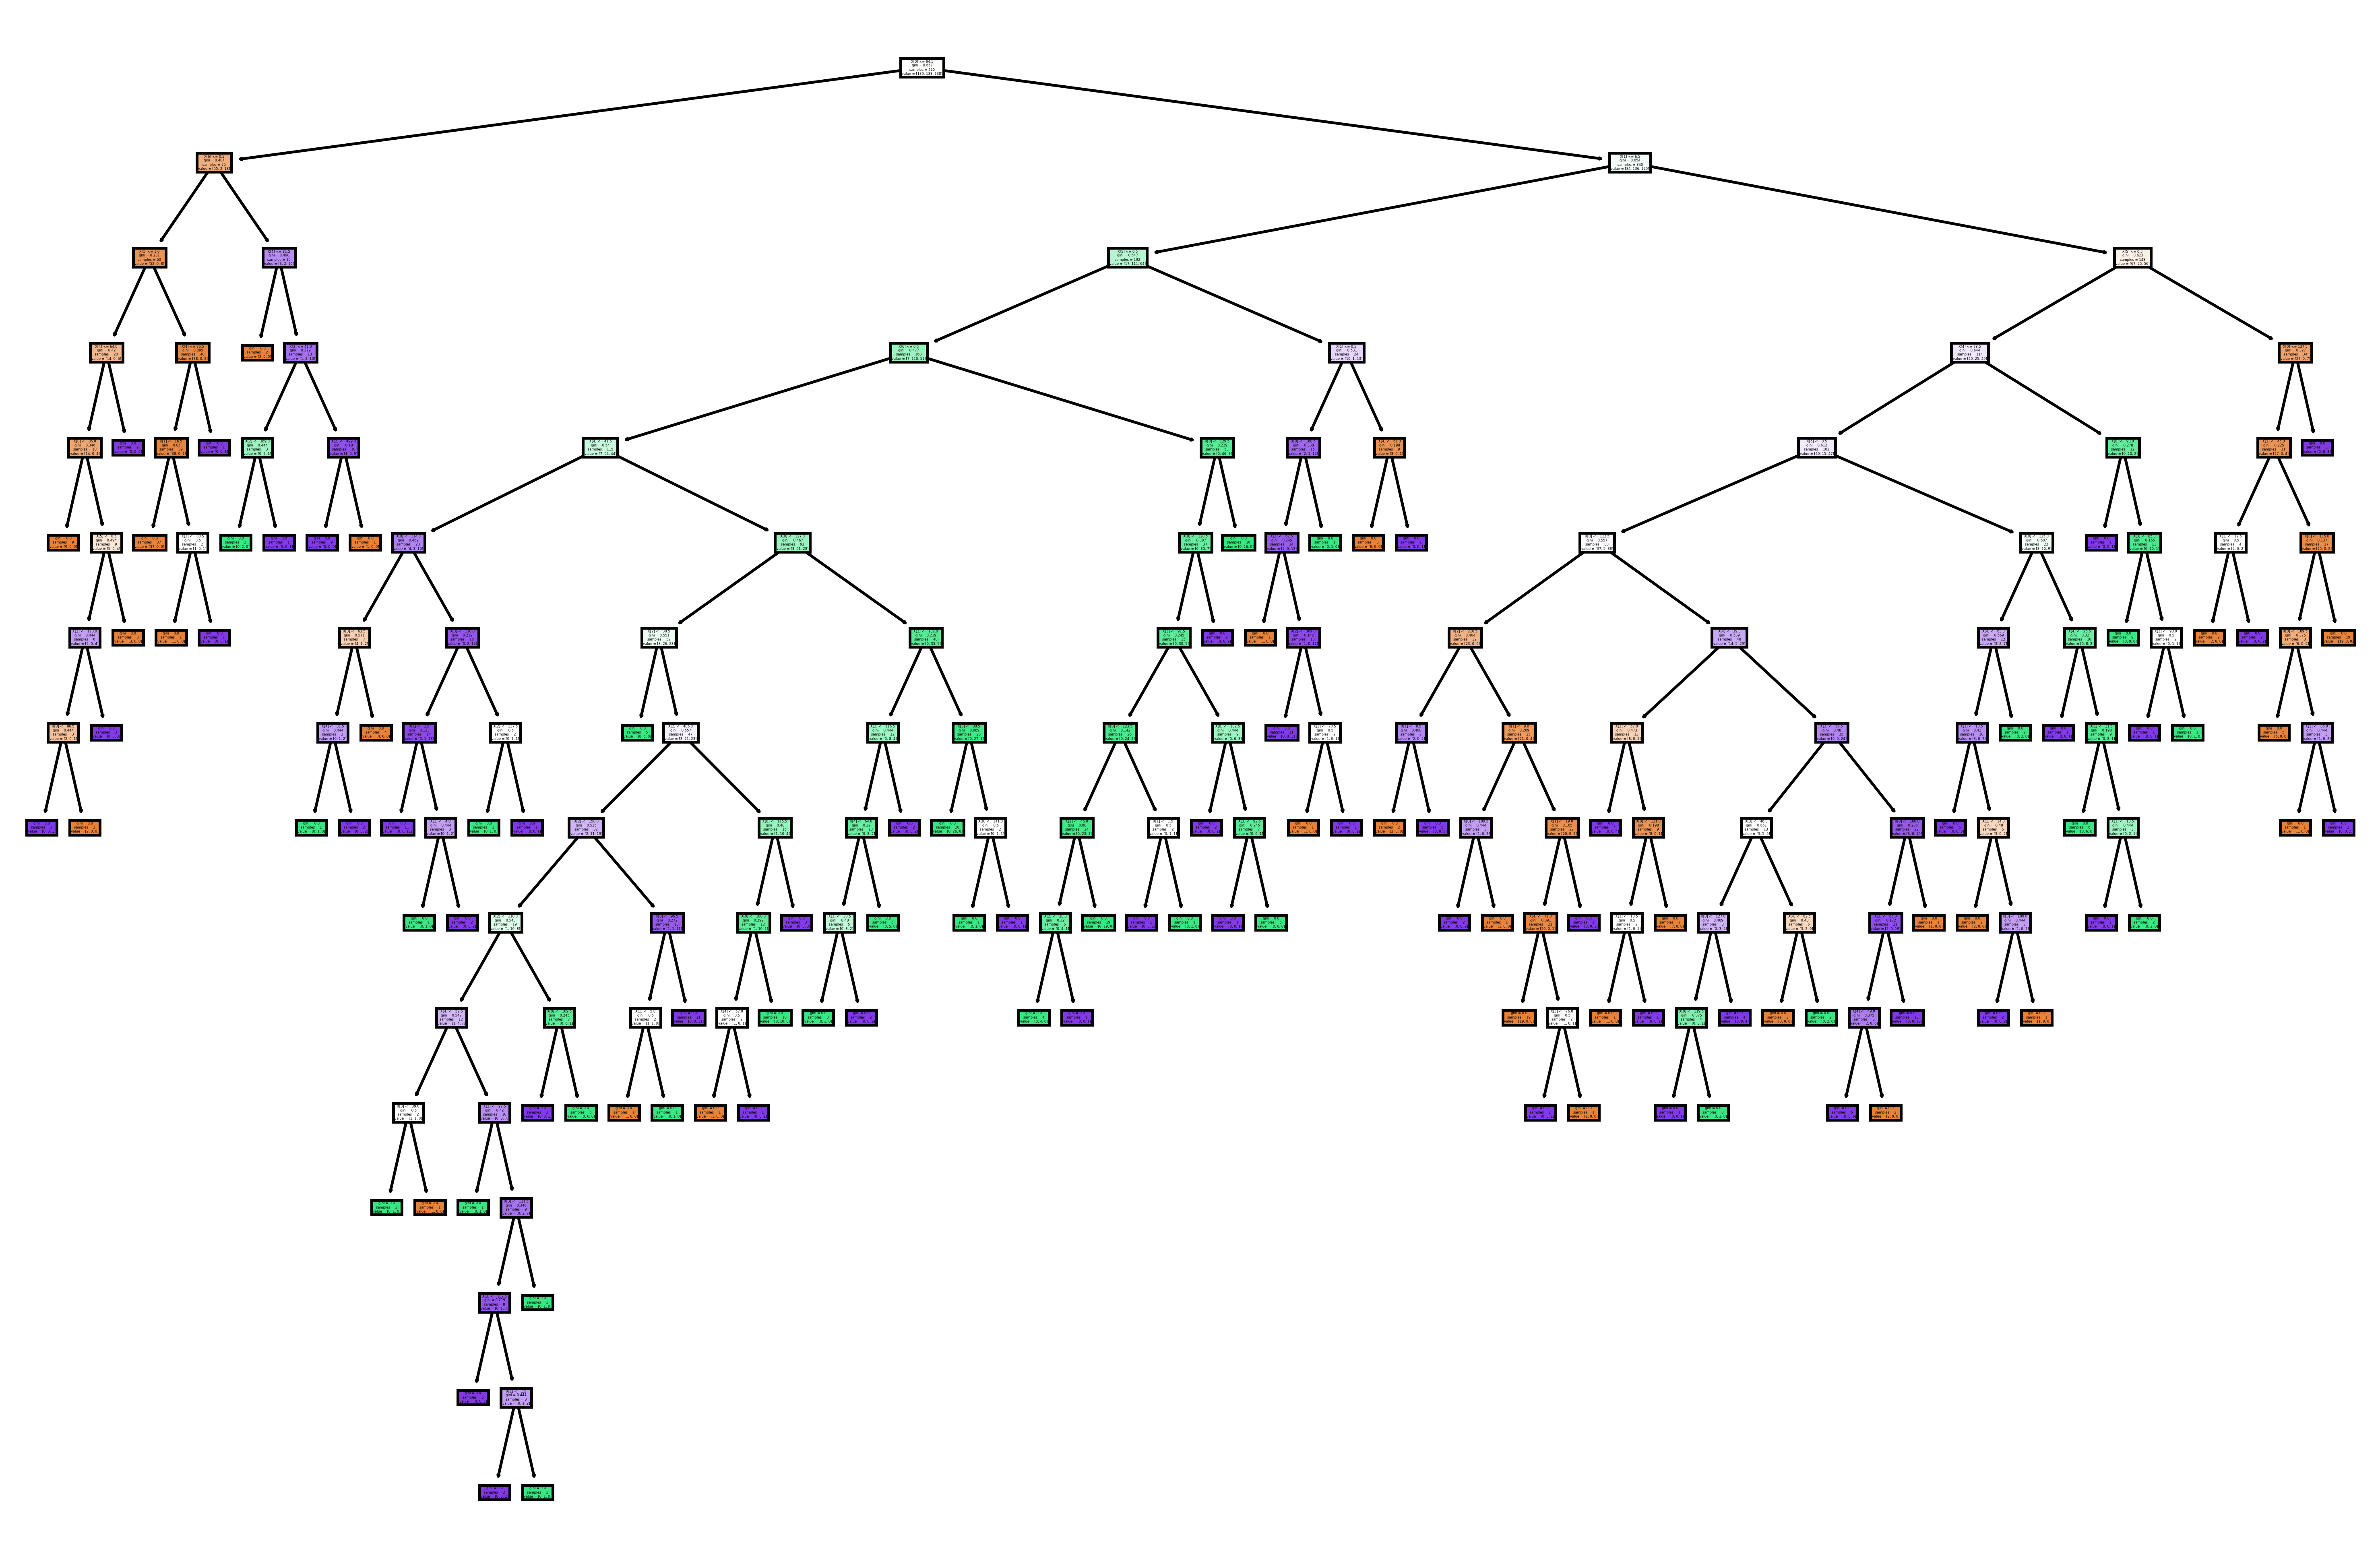

In [89]:
plt.figure(figsize=(15,10),dpi=500)
tree.plot_tree(model_gini,filled=True)
plt.show()

In [90]:
#Predicting on test data
preds = model_gini.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    63
2    61
1    55
dtype: int64

In [91]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0       0   1   2
Sales_cat            
0          46   0  14
1           2  42  15
2          15  13  32

In [92]:
# Accuracy 
np.mean(preds==y_test)

0.6703910614525139

In [93]:
# Classification Report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75        60
           1       0.76      0.71      0.74        59
           2       0.52      0.53      0.53        60

    accuracy                           0.67       179
   macro avg       0.67      0.67      0.67       179
weighted avg       0.67      0.67      0.67       179



In [94]:
path = model_gini.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [95]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='gini',random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.059187213033181196


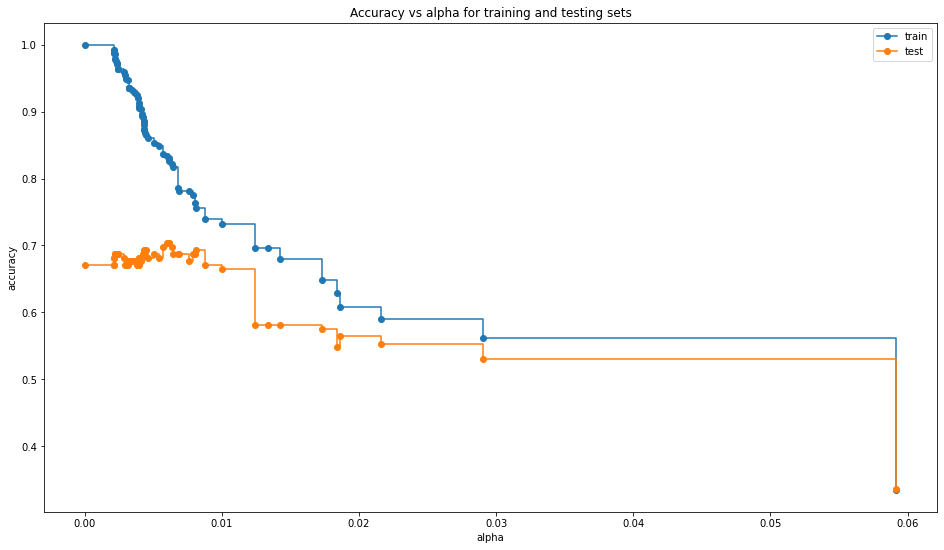

In [96]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(16,9))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [97]:
ccp_alphas

array([0.        , 0.00210843, 0.00210843, 0.0021419 , 0.0021419 ,
       0.00219058, 0.00222428, 0.00222428, 0.00229489, 0.00232358,
       0.00234785, 0.00240964, 0.00240964, 0.00240964, 0.00289157,
       0.00295181, 0.00297486, 0.00313253, 0.00321285, 0.00321285,
       0.00321285, 0.00321285, 0.00342704, 0.00361446, 0.00365097,
       0.00381305, 0.00385542, 0.00391897, 0.00393258, 0.00394722,
       0.00413081, 0.0041621 , 0.00417253, 0.0042176 , 0.0042838 ,
       0.0042838 , 0.00431267, 0.00432499, 0.00433735, 0.00436317,
       0.00446092, 0.00463186, 0.00506386, 0.00542169, 0.00567655,
       0.0060241 , 0.00611677, 0.00612913, 0.00634538, 0.0064257 ,
       0.00680699, 0.00688468, 0.00760637, 0.0079099 , 0.00802483,
       0.00809725, 0.00879183, 0.00999977, 0.01237933, 0.01332756,
       0.01423025, 0.01726994, 0.01840178, 0.01859773, 0.02159036,
       0.02900531, 0.05918721])

In [98]:
clf = DecisionTreeClassifier(criterion='gini',random_state=42, ccp_alpha=0.02159036)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.02159036, random_state=42)

In [99]:
pred_test=clf.predict(x_test)
pred_train=clf.predict(x_train)
from sklearn.metrics import accuracy_score
print('Training Accuracy',accuracy_score(y_train, pred_train),'\n'
'Testing Accuracy',accuracy_score(y_test, pred_test))

Training Accuracy 0.6072289156626506 
Testing Accuracy 0.5642458100558659


<AxesSubplot:>

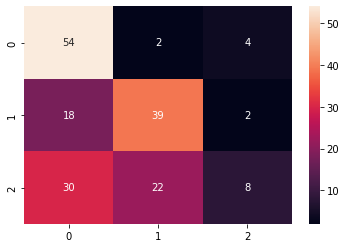

In [100]:
sb.heatmap(confusion_matrix(y_test, pred_test),annot=True)

In [101]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.53      0.90      0.67        60
           1       0.62      0.66      0.64        59
           2       0.57      0.13      0.22        60

    accuracy                           0.56       179
   macro avg       0.57      0.56      0.51       179
weighted avg       0.57      0.56      0.51       179



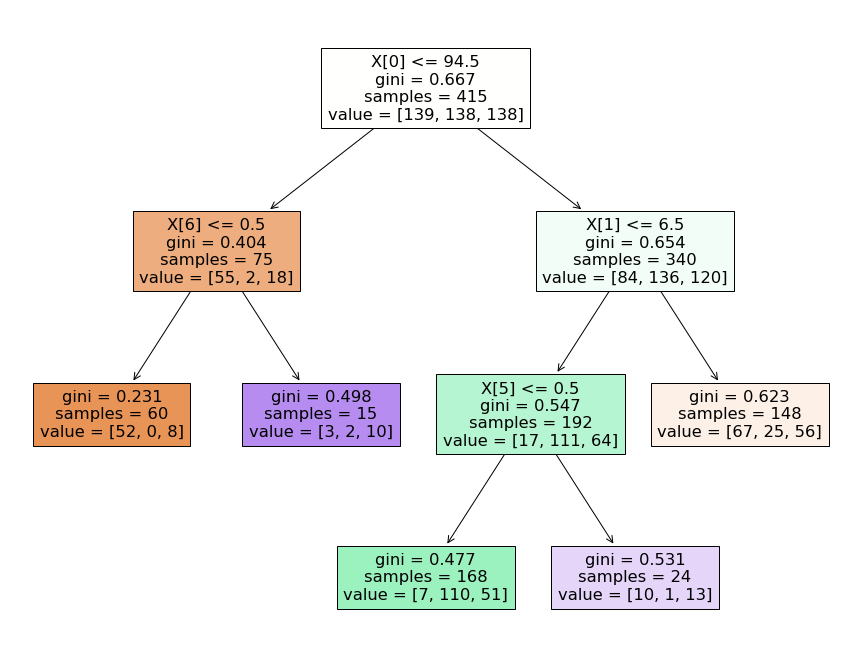

In [102]:
plt.figure(figsize=(15,12))
tree.plot_tree(clf,filled=True)
plt.show()

[Text(0.5, 0.875, 'Price <= 94.5\ngini = 0.667\nsamples = 415\nvalue = [139, 138, 138]\nclass = Low'),
 Text(0.25, 0.625, 'Shelve_loc_Bad <= 0.5\ngini = 0.404\nsamples = 75\nvalue = [55, 2, 18]\nclass = Low'),
 Text(0.125, 0.375, 'gini = 0.231\nsamples = 60\nvalue = [52, 0, 8]\nclass = Low'),
 Text(0.375, 0.375, 'gini = 0.498\nsamples = 15\nvalue = [3, 2, 10]\nclass = High'),
 Text(0.75, 0.625, 'Advertising <= 6.5\ngini = 0.654\nsamples = 340\nvalue = [84, 136, 120]\nclass = medium'),
 Text(0.625, 0.375, 'Shelve_loc_Good <= 0.5\ngini = 0.547\nsamples = 192\nvalue = [17, 111, 64]\nclass = medium'),
 Text(0.5, 0.125, 'gini = 0.477\nsamples = 168\nvalue = [7, 110, 51]\nclass = medium'),
 Text(0.75, 0.125, 'gini = 0.531\nsamples = 24\nvalue = [10, 1, 13]\nclass = High'),
 Text(0.875, 0.375, 'gini = 0.623\nsamples = 148\nvalue = [67, 25, 56]\nclass = Low')]

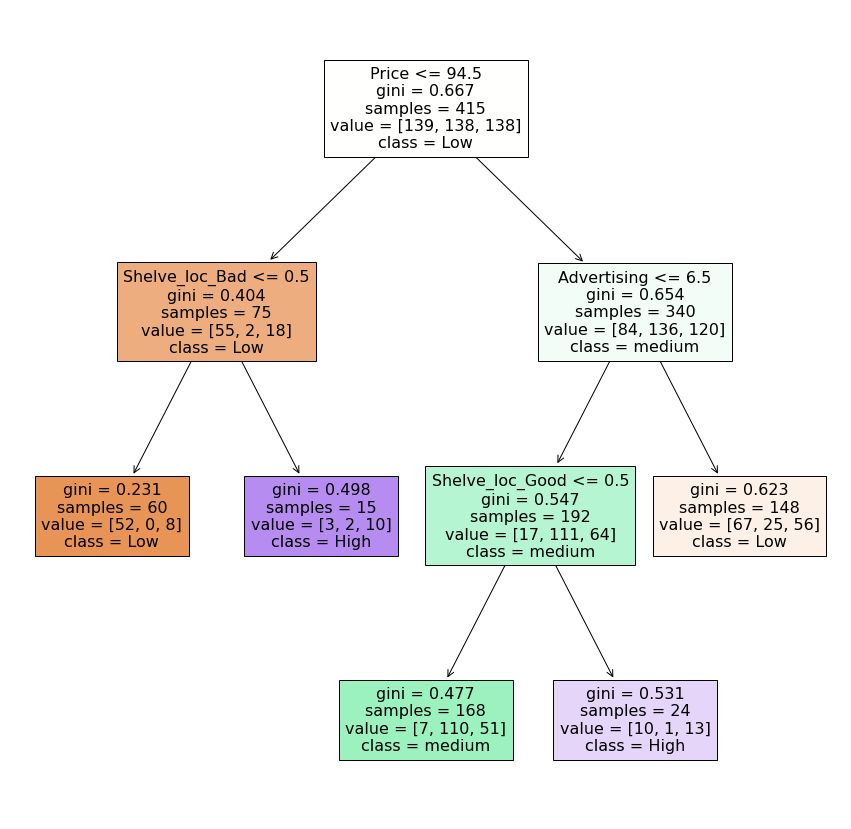

In [103]:
fn = x_train.columns
cn = ['Low','medium','High']
plt.figure(figsize=(15,15))
tree.plot_tree(clf, feature_names=fn, class_names=cn, filled=True)

In [104]:
clf.feature_importances_

array([0.34051237, 0.36005199, 0.        , 0.        , 0.        ,
       0.17165941, 0.12777623])

In [105]:
feature_imp = pd.Series(clf.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

Advertising        0.360052
Price              0.340512
Shelve_loc_Good    0.171659
Shelve_loc_Bad     0.127776
Population         0.000000
Income             0.000000
Avg_age            0.000000
dtype: float64